In [2]:
import networkx as nx
import localgraphclustering as lgc
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import pandas as pd

## Use the digits graph

In [3]:
# Load digits
G = lgc.GraphLocal("digits-1234-3.edges",separator=" ")
xy = np.loadtxt("digits-1234-3.edges.xy")
l = np.loadtxt("digits-1234-3.labels")
Xc = xy

## First show a simple drawing

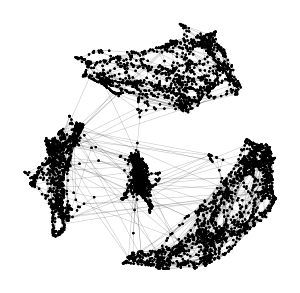

In [5]:
drawing = G.draw(Xc,edgealpha=0.25,nodesize=6,nodealpha=1,linewidth=0.5,nodecolor=['k'],figsize=(5,5))
#drawing.nodewidth(range(G._num_vertices),0.2)
#drawing.nodecolor(range(G._num_vertices),edgecolor='k',alpha=0.5)
#plt.xlim([-0.13,-0a.03])
#plt.ylim([-0.05,0.05])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

In [6]:
seed = 50
figsize=10

## Look a spectral distribution plot

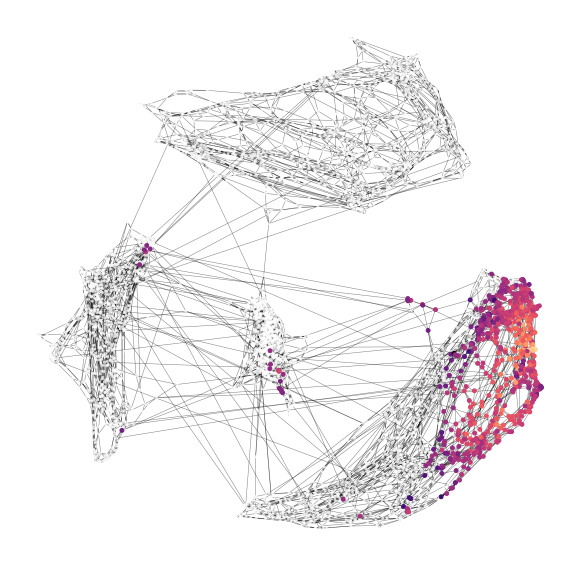

In [7]:
acl = lgc.approximate_PageRank(G,[seed],normalize=False,method='l1reg')
drawing = G.draw(Xc,nodesize=8,nodealpha=0.5,linewidth=0.5,
                 figsize=(figsize,figsize),edgealpha=0.5,nodecolor='w')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gca().scatter(Xc[acl[0],0],Xc[acl[0],1],c=np.log10(acl[1]),cmap=plt.magma(),s=15,zorder=3)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

In [9]:
Sspectral,cond = lgc.sweep_cut(G,acl)

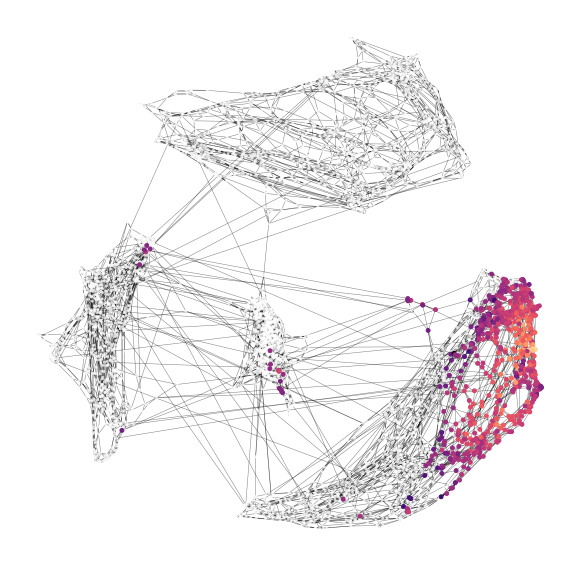

In [10]:
acl = lgc.approximate_PageRank(G,Sspectral,normalize=False,method='l1reg')
drawing = G.draw(Xc,nodesize=8,nodealpha=0.5,linewidth=0.5,
                 figsize=(figsize,figsize),edgealpha=0.5,nodecolor='w')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gca().scatter(Xc[acl[0],0],Xc[acl[0],1],c=np.log10(acl[1]),cmap=plt.magma(),s=15,zorder=3)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

## A useful little utility to count!

In [12]:
# Quick little example of how counters help collect the stats we need. 
from collections import Counter
Sall = Counter()
Sall.update([1,2,3])
Sall.update([2,3,4])
Sall.keys(), Sall.values()

(dict_keys([1, 2, 3, 4]), dict_values([1, 2, 2, 1]))

## Look at flow distribution on the spectral region
This works better than an idea below.

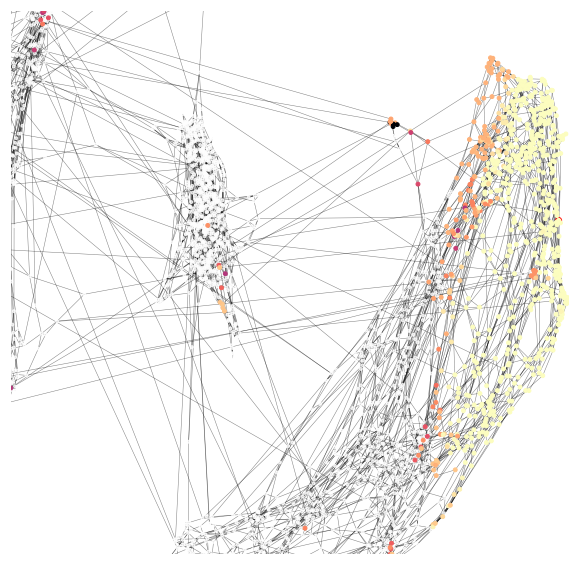

In [14]:
#R = expand_neighbors(G,Sspectral)
R = Sspectral
Sall = Counter()
for i in range(100):
    Rs = np.random.choice(R,len(R)//2,replace=False) # // is int division
    S,cond = lgc.flow_clustering(G,Rs,method='sl',delta=0.1)
    Sall.update(S)

nodeset = list(Sall.keys())
nodevals = list(Sall.values())
drawing = G.draw(Xc,nodesize=8,nodealpha=0.5,linewidth=0.5,
                 figsize=(figsize,figsize),edgealpha=0.5,nodecolor='w')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gca().scatter(Xc[nodeset,0],Xc[nodeset,1],c=np.log10(nodevals),cmap=plt.magma(),s=15,zorder=3)
nodecoords = Xc[nodeset,:]
drawing.nodesize([seed],36)
drawing.nodecolor([seed], 'r')
plt.xlim([np.min(nodecoords, 0)[0]-0.1,np.max(nodecoords, 0)[0]+0.1])
plt.ylim([np.min(nodecoords, 0)[1]-0.1,np.max(nodecoords,0)[1]+0.1])
#plt.ylim([-0.005,0.025])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())   

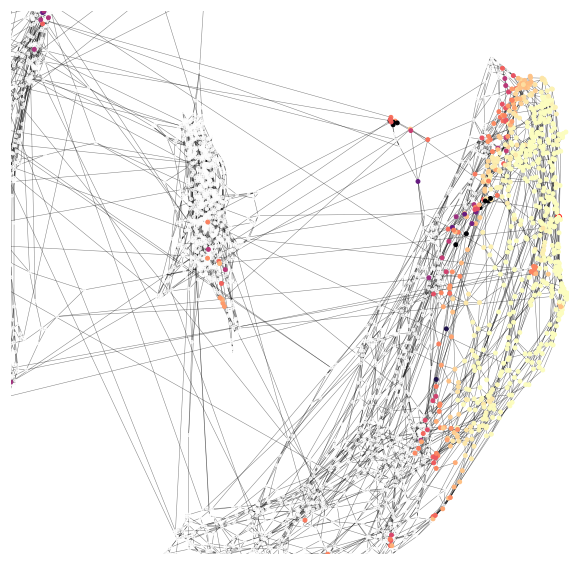

In [15]:
#R = expand_neighbors(G,Sspectral)
Sall = Counter()
for i in range(200):
    Rs = np.random.choice(R,len(R)//4,replace=False) # // is int division
    S,cond = lgc.flow_clustering(G,Rs,method='sl',delta=0.1)
    Sall.update(S)

nodeset = list(Sall.keys())
nodevals = list(Sall.values())
drawing = G.draw(Xc,nodesize=8,nodealpha=0.5,linewidth=0.5,
                 figsize=(figsize,figsize),edgealpha=0.5,nodecolor='w')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gca().scatter(Xc[nodeset,0],Xc[nodeset,1],c=np.log10(nodevals),cmap=plt.magma(),s=15,zorder=3)
nodecoords = Xc[nodeset,:]
drawing.nodesize([seed],36)
drawing.nodecolor([seed], 'r')
plt.xlim([np.min(nodecoords, 0)[0]-0.1,np.max(nodecoords, 0)[0]+0.1])
plt.ylim([np.min(nodecoords, 0)[1]-0.1,np.max(nodecoords,0)[1]+0.1])
#plt.ylim([-0.005,0.025])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())   

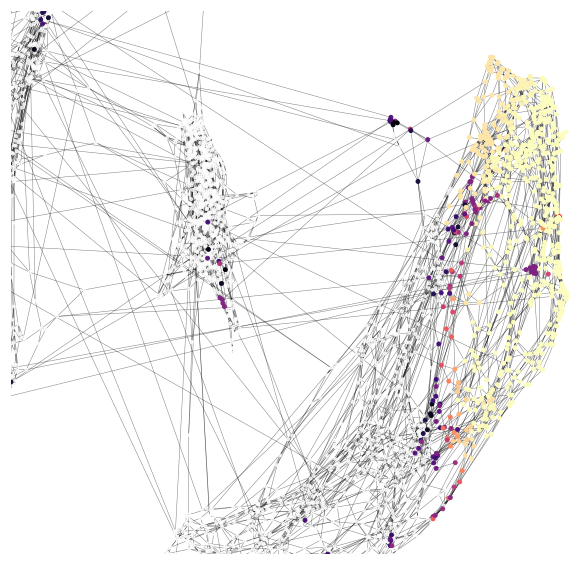

In [16]:
#R = expand_neighbors(G,Sspectral)
Sall = Counter()
for i in range(200):
    Rs = np.random.choice(R,len(R)//4,replace=False) # // is int division
    S,cond = lgc.flow_clustering(G,Rs,method='sl',delta=0.05)
    Sall.update(S)

nodeset = list(Sall.keys())
nodevals = list(Sall.values())
drawing = G.draw(Xc,nodesize=8,nodealpha=0.5,linewidth=0.5,
                 figsize=(figsize,figsize),edgealpha=0.5,nodecolor='w')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gca().scatter(Xc[nodeset,0],Xc[nodeset,1],c=(nodevals),cmap=plt.magma(),s=15,zorder=3)
nodecoords = Xc[nodeset,:]
drawing.nodesize([seed],36)
drawing.nodecolor([seed], 'r')
plt.xlim([np.min(nodecoords, 0)[0]-0.1,np.max(nodecoords, 0)[0]+0.1])
plt.ylim([np.min(nodecoords, 0)[1]-0.1,np.max(nodecoords,0)[1]+0.1])
#plt.ylim([-0.005,0.025])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())   

## Look at flow distribution on the seed region itself (grown by BFS)
This doesn't work bcause the regions just aren't big enough.

In [36]:
def expand_neighbors(G,R):
  Re = set(R)
  for v in R:
    Re.update(G.neighbors(v))
  return list(Re)
expand_neighbors(G,[seed])

[578, 261, 168, 653, 113, 50, 401]

In [44]:
R

[1280,
 1026,
 898,
 1284,
 261,
 1037,
 653,
 272,
 401,
 535,
 677,
 934,
 167,
 168,
 38,
 50,
 312,
 578,
 1496,
 1368,
 739,
 748,
 113,
 114,
 753,
 628,
 509,
 1278]

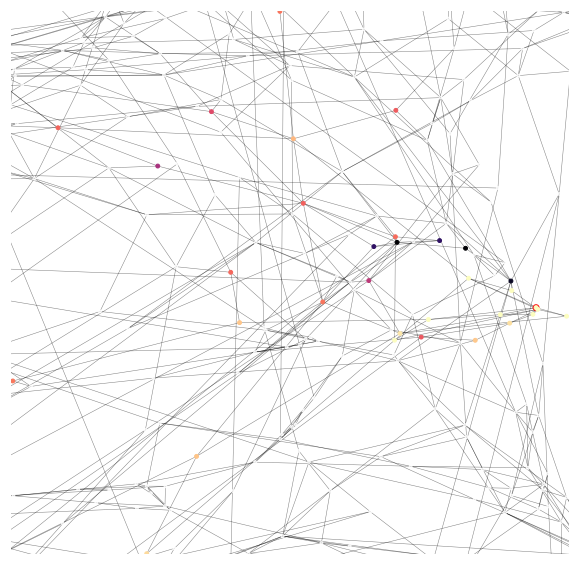

In [43]:
## Get a good reference set. 
from collections import Counter
R = expand_neighbors(G,expand_neighbors(G,expand_neighbors(G,[seed])))
Sall = Counter()
for i in range(100):
    Rs = np.random.choice(R,len(R)//2,replace=False) # // is int division
    S,cond = lgc.flow_clustering(G,Rs,method='sl',delta=0.001)
    Sall.update(S)

nodeset = list(Sall.keys())
nodevals = list(Sall.values())
drawing = G.draw(Xc,nodesize=8,nodealpha=0.5,linewidth=0.5,
                 figsize=(figsize,figsize),edgealpha=0.5,nodecolor='w')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gca().scatter(Xc[nodeset,0],Xc[nodeset,1],c=np.log10(nodevals),cmap=plt.magma(),s=15,zorder=3)
nodecoords = Xc[nodeset,:]
drawing.nodesize([seed],36)
drawing.nodecolor([seed], 'r')
plt.xlim([np.min(nodecoords, 0)[0]-0.1,np.max(nodecoords, 0)[0]+0.1])
plt.ylim([np.min(nodecoords, 0)[1]-0.1,np.max(nodecoords,0)[1]+0.1])
#plt.ylim([-0.005,0.025])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())    

In [228]:
nodecolor='#fc8d62'
hicolor='#8da0cb'
bigalpha=0.18
seed = 1500
figsize=5